FennLab-Project 2
Ev Car market Segmentation->Which has highest efficiency? How does price relate to rapid charging?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit

In [5]:
import numpy as np 
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px

%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#load the dataset
dd=pd.read_csv("ElectricCarData_Clean.csv")

In [7]:
dd

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5000,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5000,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9000,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1000,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [8]:
dd.shape

(103, 14)

In [9]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [10]:

dd['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
dd.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997


In [11]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [13]:
dd["FastCharge_KmH"].dtype

dtype('O')

In [14]:
# Assuming df is your DataFrame
# Replace non-numeric values (like '-') with a default value (e.g., 0)
dd['FastCharge_KmH'] = dd['FastCharge_KmH'].replace('-', 0)

# Convert the 'FastCharge_KmH' column to integer type
dd['FastCharge_KmH'] = dd['FastCharge_KmH'].astype('int64')

In [15]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 11.4+ KB


In [16]:
#to add new column for converting euro to indian currency
dd['INR(10e3)'] = dd['PriceEuro']*0.08320

In [17]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  INR(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


EDA

In [18]:
dd.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [19]:
dd.shape

(103, 15)

In [20]:
dd.describe()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,INR(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,434.5631,0.9515,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,219.6601,0.2160,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,0.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,260.0000,1.0000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,555.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


In [77]:
#check for null
dd.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
INR(10e3)          0
dtype: int64

In [21]:
#duplicate checking
dd.duplicated().sum()

0

In [22]:
dd.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 'INR(10e3)'],
      dtype='object')

In [23]:
dd["Brand"].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

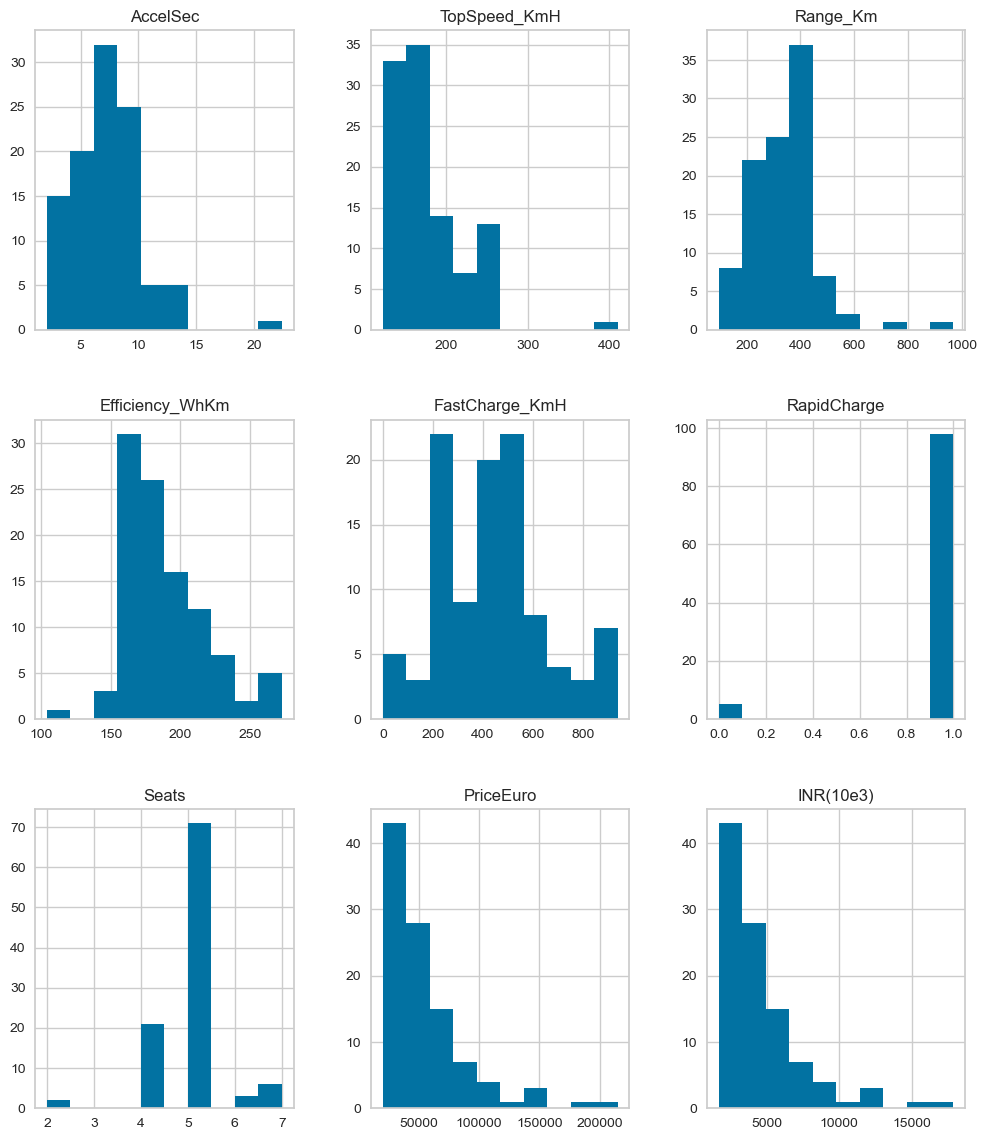

In [24]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
dd.hist()
plt.show()

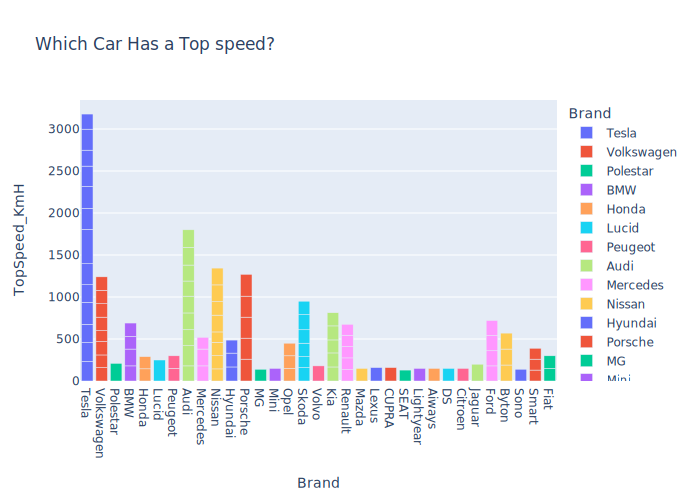

In [12]:
fig = px.bar(dd,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

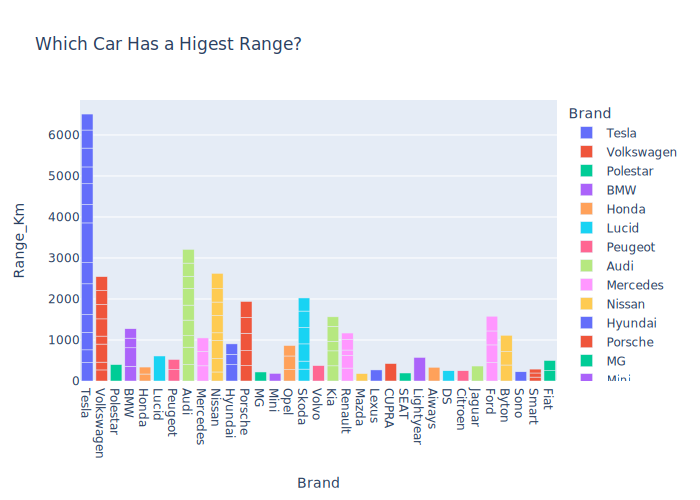

In [26]:
fig = px.bar(dd,x='Brand',y = 'Range_Km',color = 'Brand',title = 'Which Car Has a Higest Range?',labels = {'x':'Car Brands','y':'Range_Km'})
pio.show(fig)

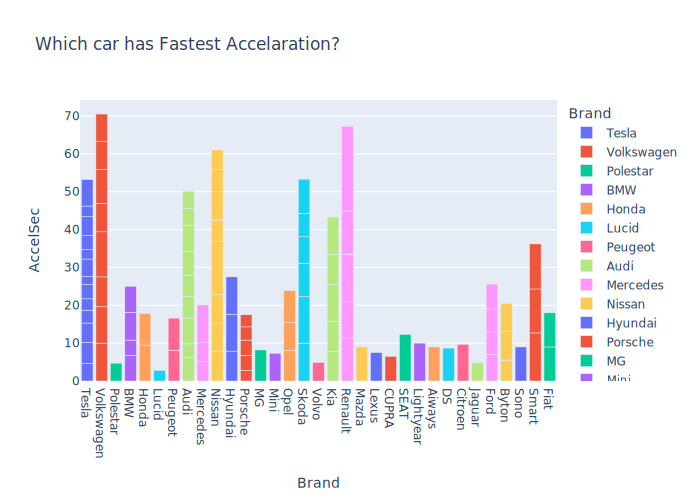

In [27]:
fig = px.bar(dd,x= 'Brand',y ='AccelSec',color = 'Brand',title = 'Which car has Fastest Accelaration?',labels = {'x':'Car Brands','y':'Accelaration'})
pio.show(fig)

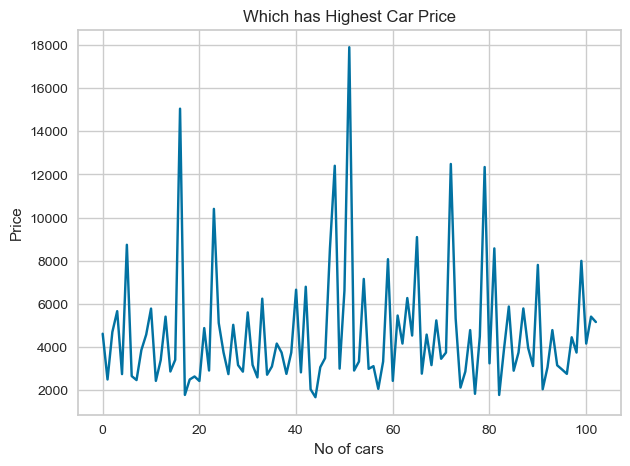

In [28]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(dd["INR(10e3)"])
plt.xlabel("No of cars")
plt.ylabel("Price")
plt.title("Which has Highest Car Price")
plt.show()

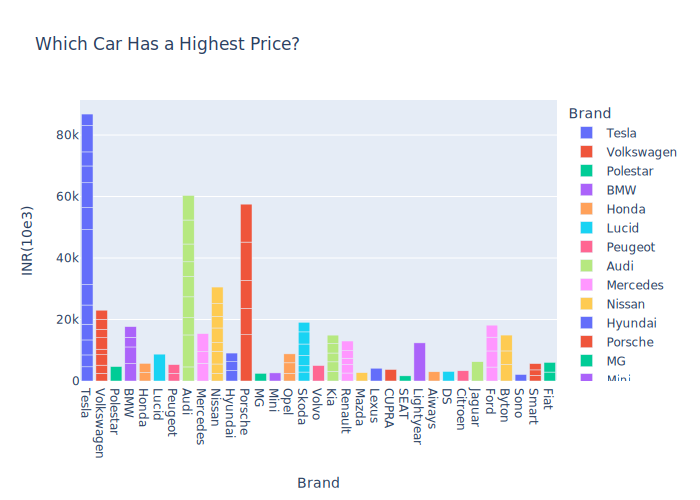

In [29]:
fig = px.bar(dd,x='Brand',y = 'INR(10e3)',color = 'Brand',title = 'Which Car Has a Highest Price?',labels = {'x':'Car Brands','y':'Price'})
pio.show(fig)

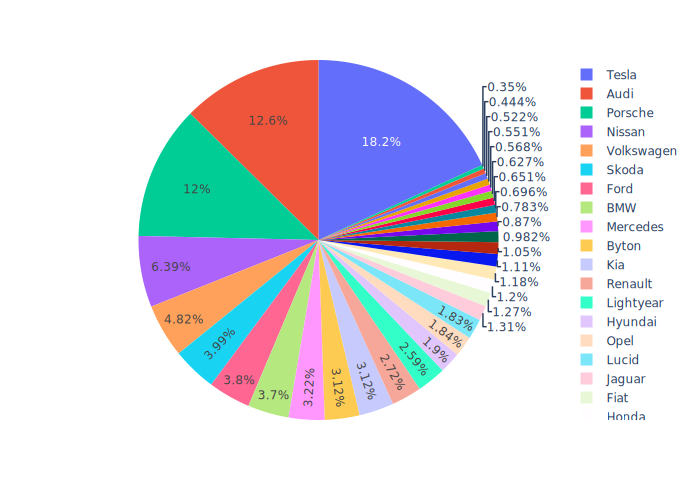

In [30]:
fig = px.pie(dd,names = 'Brand',values = 'INR(10e3)')
pio.show(fig)

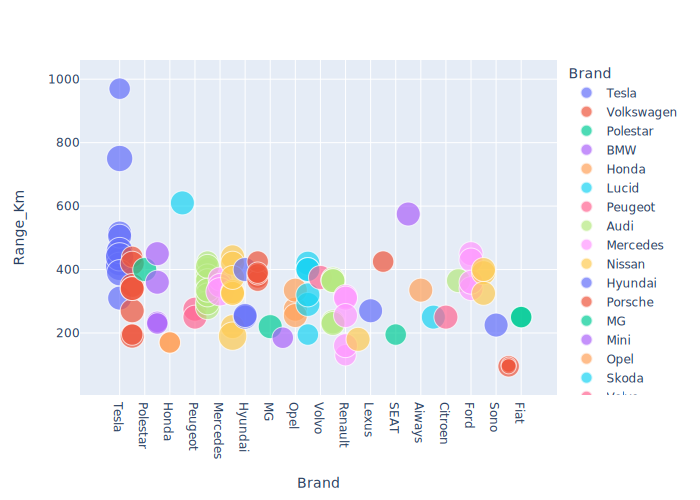

In [31]:
fig = px.scatter(dd,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','INR(10e3)'])
pio.show(fig)


C:\Users\sarav\AppData\Local\Temp\ipykernel_7892\617222163.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

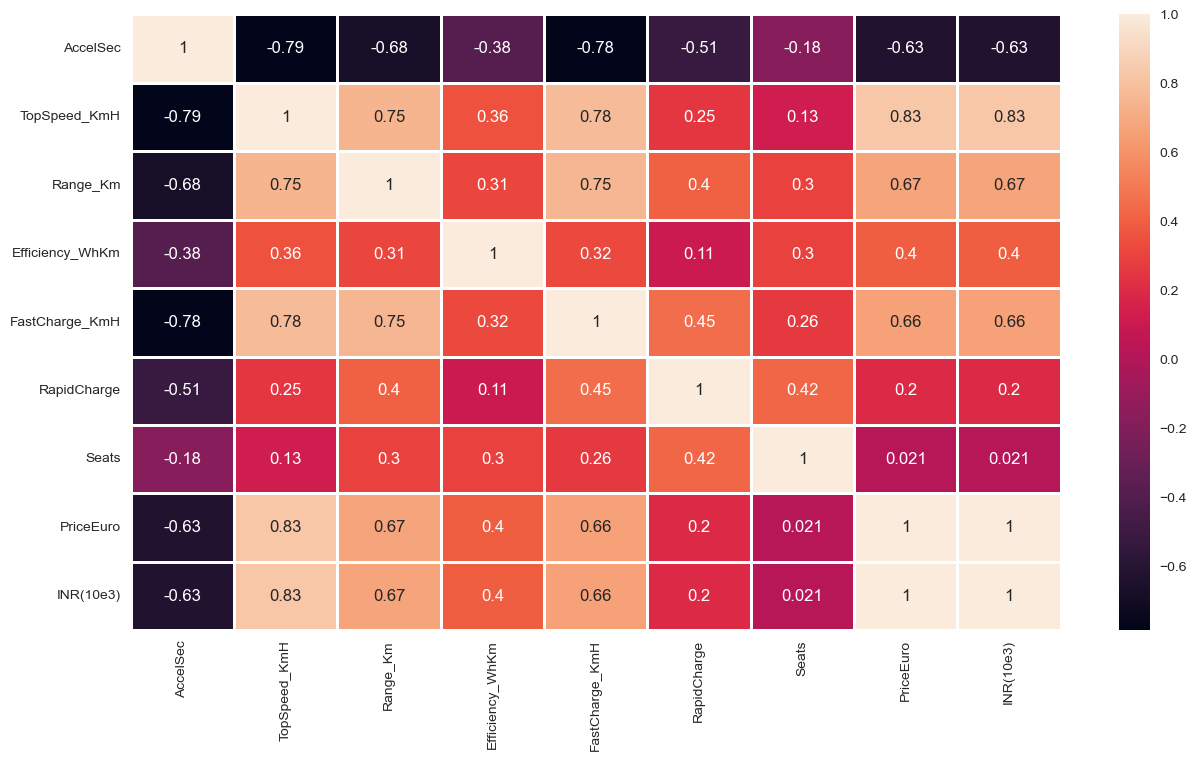

In [32]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(dd.corr(),linewidths=1,linecolor='white',annot=True)

Car Efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

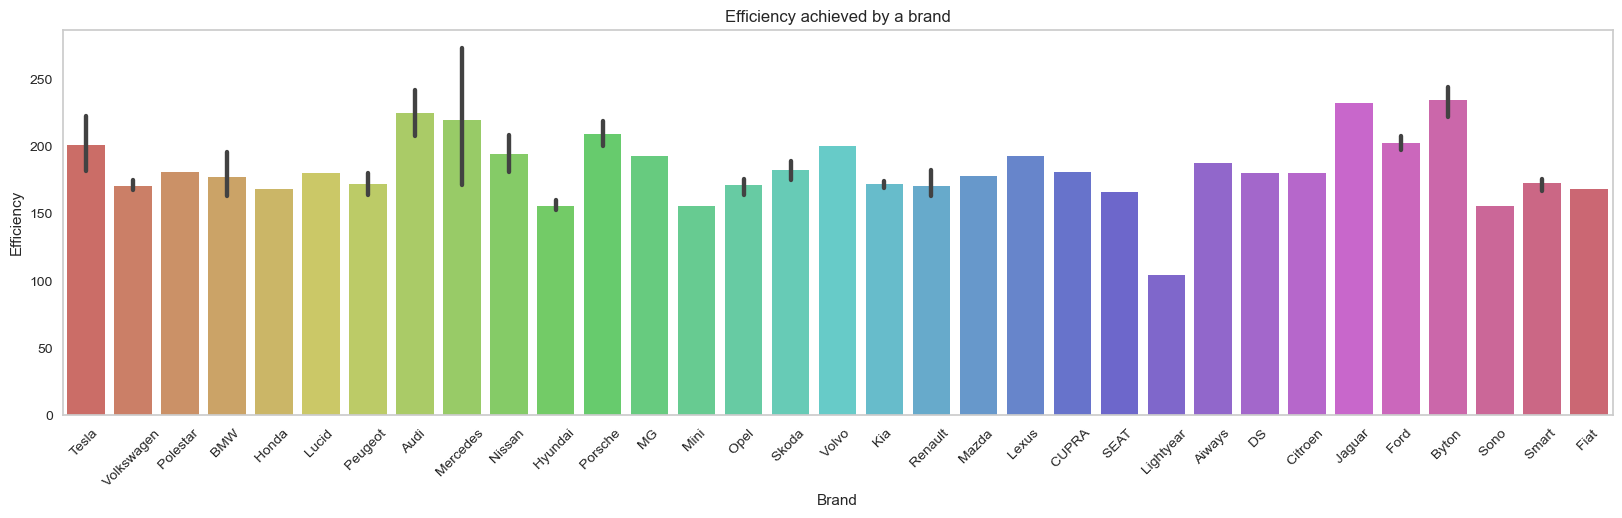

In [33]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=dd,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
     

Car Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

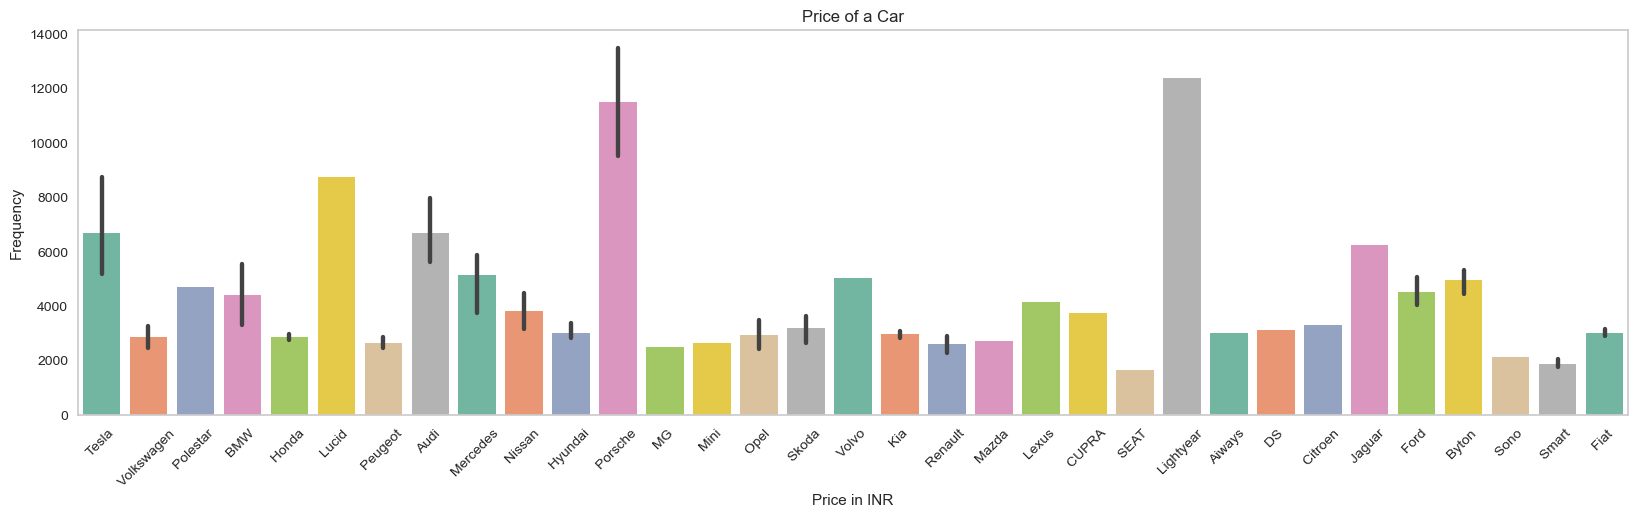

In [34]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='INR(10e3)',data=dd,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Type of Plug ')

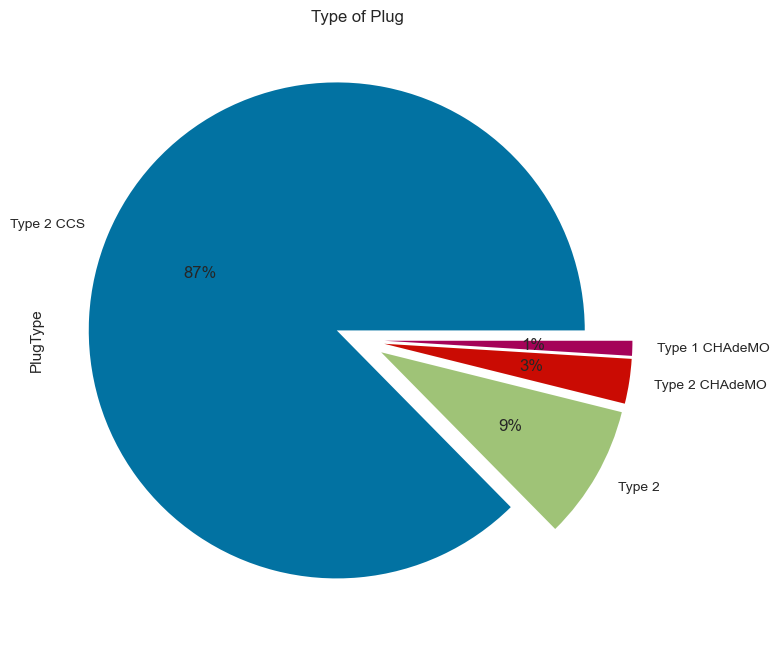

In [35]:
dd['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Type of Plug ')

In [36]:
dd3= dd[["TopSpeed_KmH", "INR(10e3)"]].groupby("TopSpeed_KmH").count()
dd4= dd[["Range_Km", "INR(10e3)"]].groupby("Range_Km").count()
dd5= dd[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
dd5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [37]:
dd3=dd3.sort_values("TopSpeed_KmH",ascending = False).head(10)
dd4=dd4.sort_values("Range_Km",ascending = False).head(10)
dd5=dd5.sort_values("Range_Km",ascending = False).head(10)

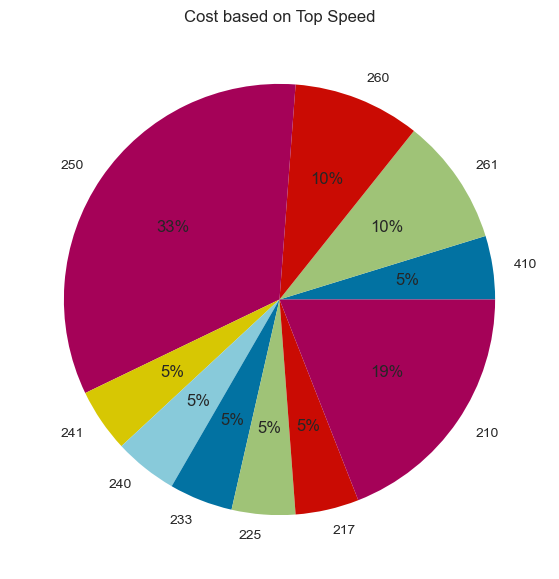

In [38]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Top Speed')
plt.pie(x=dd3["INR(10e3)"],labels=dd3.index,autopct='%1.0f%%')
plt.show()

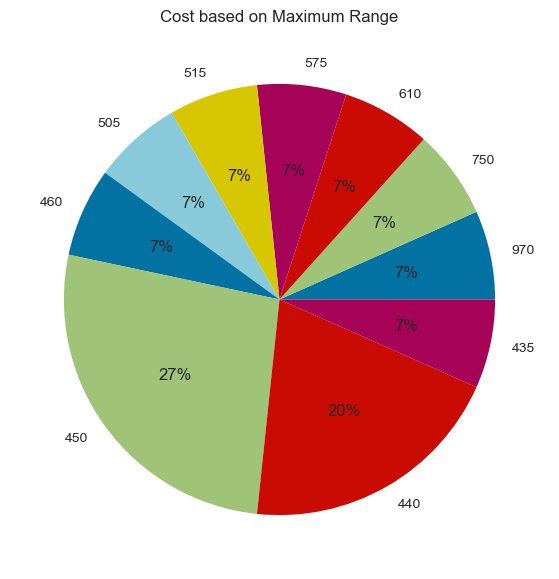

In [39]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=dd4["INR(10e3)"],labels=dd4.index,autopct='%1.0f%%')
plt.show()

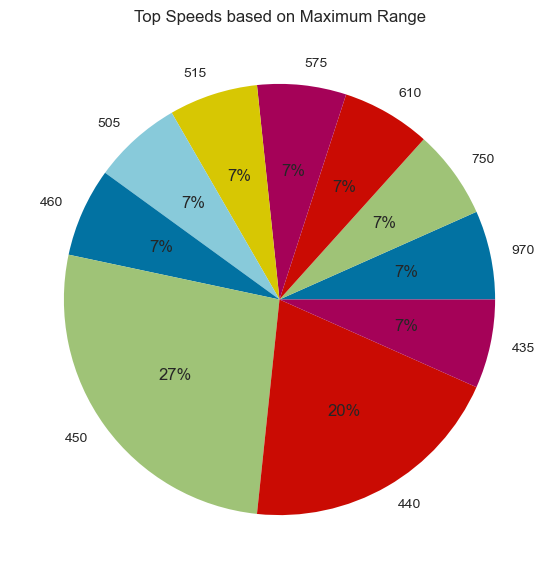

In [40]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=dd5["TopSpeed_KmH"],labels=dd5.index,autopct='%1.0f%%')
plt.show()

Build the Model

In [41]:
#Linear Regression.Split the Target variable and independent variables
dd['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=dd[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=dd['PriceEuro']

In [42]:
#OLS model
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [43]:
#fitting and summaries the model
model=results.fit()
model.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.34
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.60e-24
Time:                        18:49:50   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.576e+04   3.04e+04     -3.148      0.002   -1.56e+05   -3.54e+04
AccelSec         1538.7358   1189.961      1.293      0.199    -823.317    3900.789
Range_Km           38.6413     23.362      1.654      0.101      -7.732      85.015
TopSpeed_KmH      570.8864     86.671      6.587      0.000     398.845     742.927
Efficiency_WhKm   112.0050     70.227      1.595      0.114     -27.395     251.405
RapidCharge     -2827.5602   1.09e+04     -0.259      0.796   -2.45e+04    1.88e+04
PowerTrain       5458.2534   2954.494      1.847      0.068    -406.371    1.13e+04
==============================================================================
Omnibus:                       84.153   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.603
Skew:                           2.620   Prob(JB):                    7.44e-158
Kurtosis:                      14.881   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [45]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [46]:
#finding R square value
r2=(r2_score(y_test,pred))
print(r2*100)

78.56505811253689


In [48]:
y1=dd[['RapidCharge']]
x1=dd[['PriceEuro']]

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [50]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [51]:
#confusion matrix of the regression
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  1],
       [ 0, 20]], dtype=int64)

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

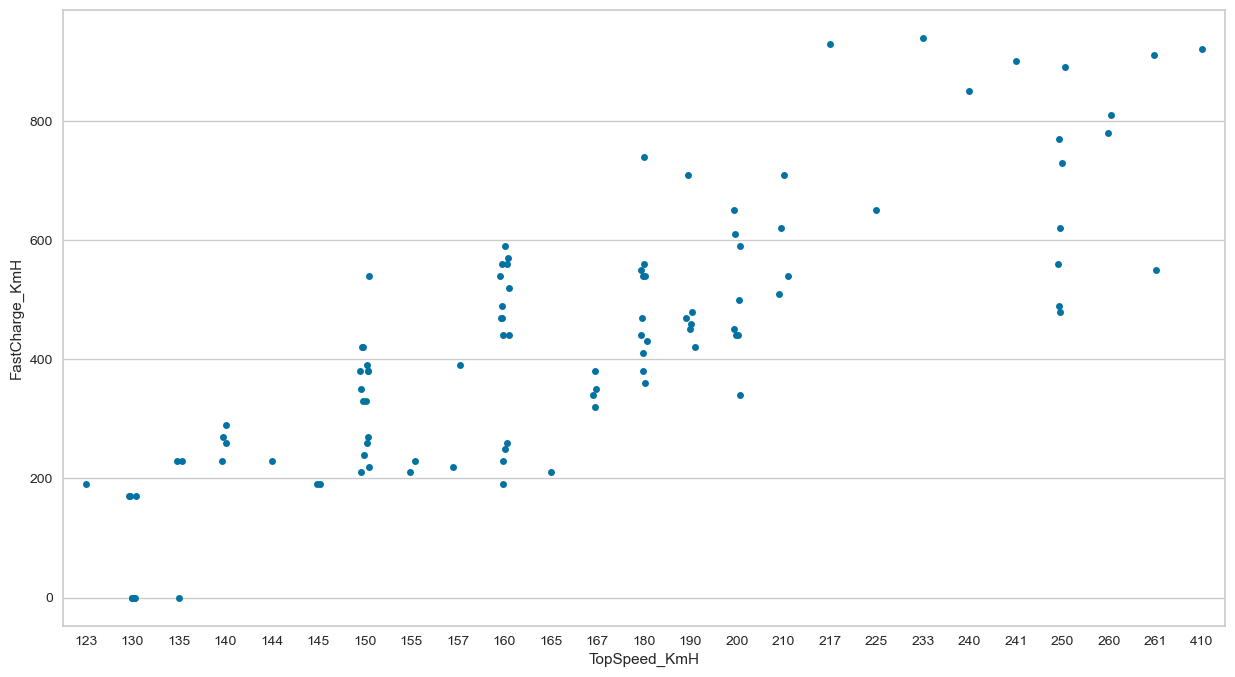

In [53]:
#clustering
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=dd, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

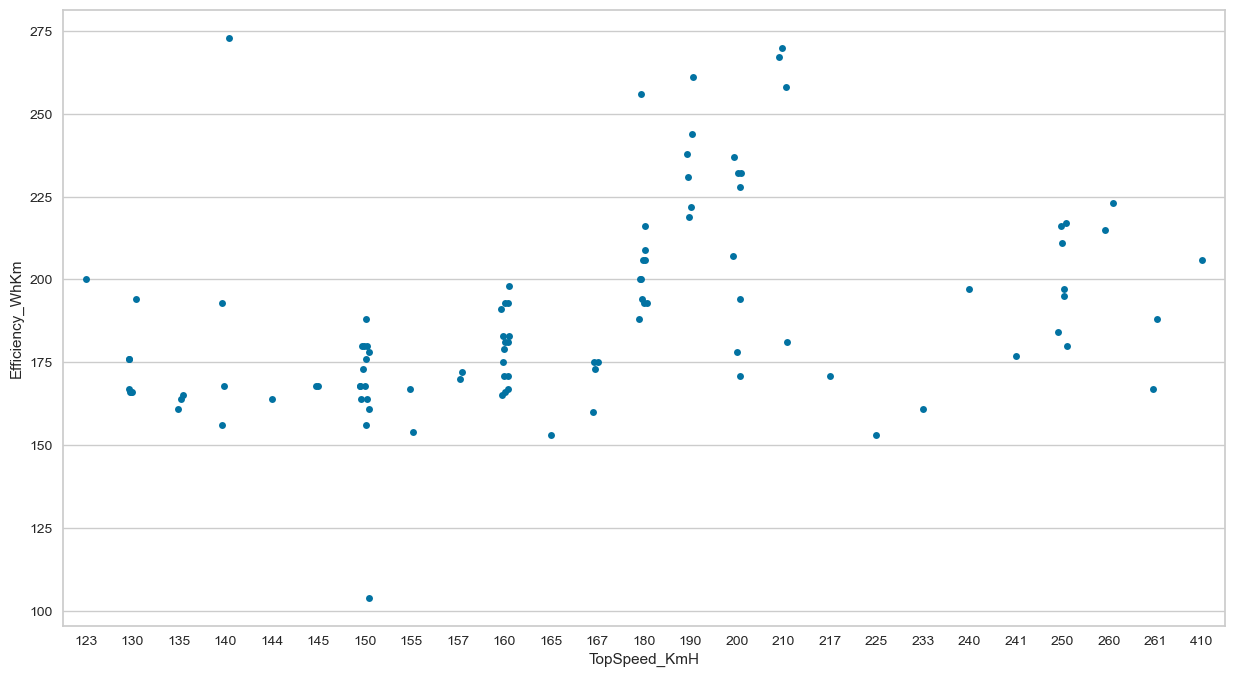

In [54]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=dd, jitter=True)

In [57]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR(10e3)','PowerTrain']
# Separating out the features
x = dd.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [58]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.3273,0.2511,-1.2859,-0.5895,0.7417,-1.3361,0.3337,-0.7935,-0.3591
1,-1.9172,-0.5705,-0.7038,0.5995,0.2045,0.3454,-0.3998,0.2480,-0.3249
2,1.5288,0.0258,-0.3805,-0.6825,0.1082,-0.7271,0.2803,0.0318,-0.0869
3,0.2593,-0.1002,-0.2530,1.6093,-0.1498,0.1784,-0.4338,-0.2897,0.1860
4,-2.5665,0.2580,-0.7914,0.3228,-0.8995,0.3411,-0.5024,0.1261,-0.1654
...,...,...,...,...,...,...,...,...,...
98,-0.3008,-0.4577,-0.0692,0.1657,-0.1673,-0.0417,0.1438,-0.1380,0.1342
99,2.2489,0.1945,1.8009,0.1557,-1.1269,0.0738,-0.3474,-0.0738,0.1014
100,0.7491,-0.1768,0.2821,-0.8161,-0.2874,-0.4458,0.0749,0.2859,-0.2652
101,1.4900,-0.1188,1.1582,-0.1823,-0.7227,-0.1102,0.2855,0.3010,-0.1014


In [60]:

dd_9=data2.iloc[:,:9]
dd_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.3273,0.2511,-1.2859,-0.5895,0.7417,-1.3361,0.3337,-0.7935,-0.3591
1,-1.9172,-0.5705,-0.7038,0.5995,0.2045,0.3454,-0.3998,0.2480,-0.3249
2,1.5288,0.0258,-0.3805,-0.6825,0.1082,-0.7271,0.2803,0.0318,-0.0869


In [61]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_dd = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_dd['variable'] = dd_9.columns.values
loadings_dd = loadings_dd.set_index('variable')
loadings_dd

D:\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.3974,-0.0310,0.1799,-0.0822,0.3500,0.4730,0.0118,-0.4834,-0.4710
PC2,0.4055,0.2644,-0.0477,0.0336,0.1620,-0.1261,-0.3314,0.3104,-0.7168
PC3,0.2315,-0.0856,0.7464,0.4133,-0.4139,0.0796,0.1113,-0.0767,-0.1231
PC4,0.3993,0.0205,-0.2067,0.1763,0.0885,-0.4018,0.0090,-0.7726,0.0075
Pc5,0.2323,-0.5360,-0.4320,-0.0949,-0.4998,0.3945,-0.0735,-0.0656,-0.2189
PC6,0.3851,0.0144,-0.1559,0.2351,0.3780,0.3303,0.6991,0.1747,0.0243
PC7,0.1577,-0.7160,0.2272,0.0413,0.5207,-0.1047,-0.3031,0.1231,0.1415
PC8,0.3717,0.3477,0.0716,-0.0537,0.0856,0.5559,-0.4739,-0.1109,0.4239
PC9,0.3150,-0.0168,0.3127,-0.8493,-0.0301,-0.0884,0.2587,-0.0699,-0.0298


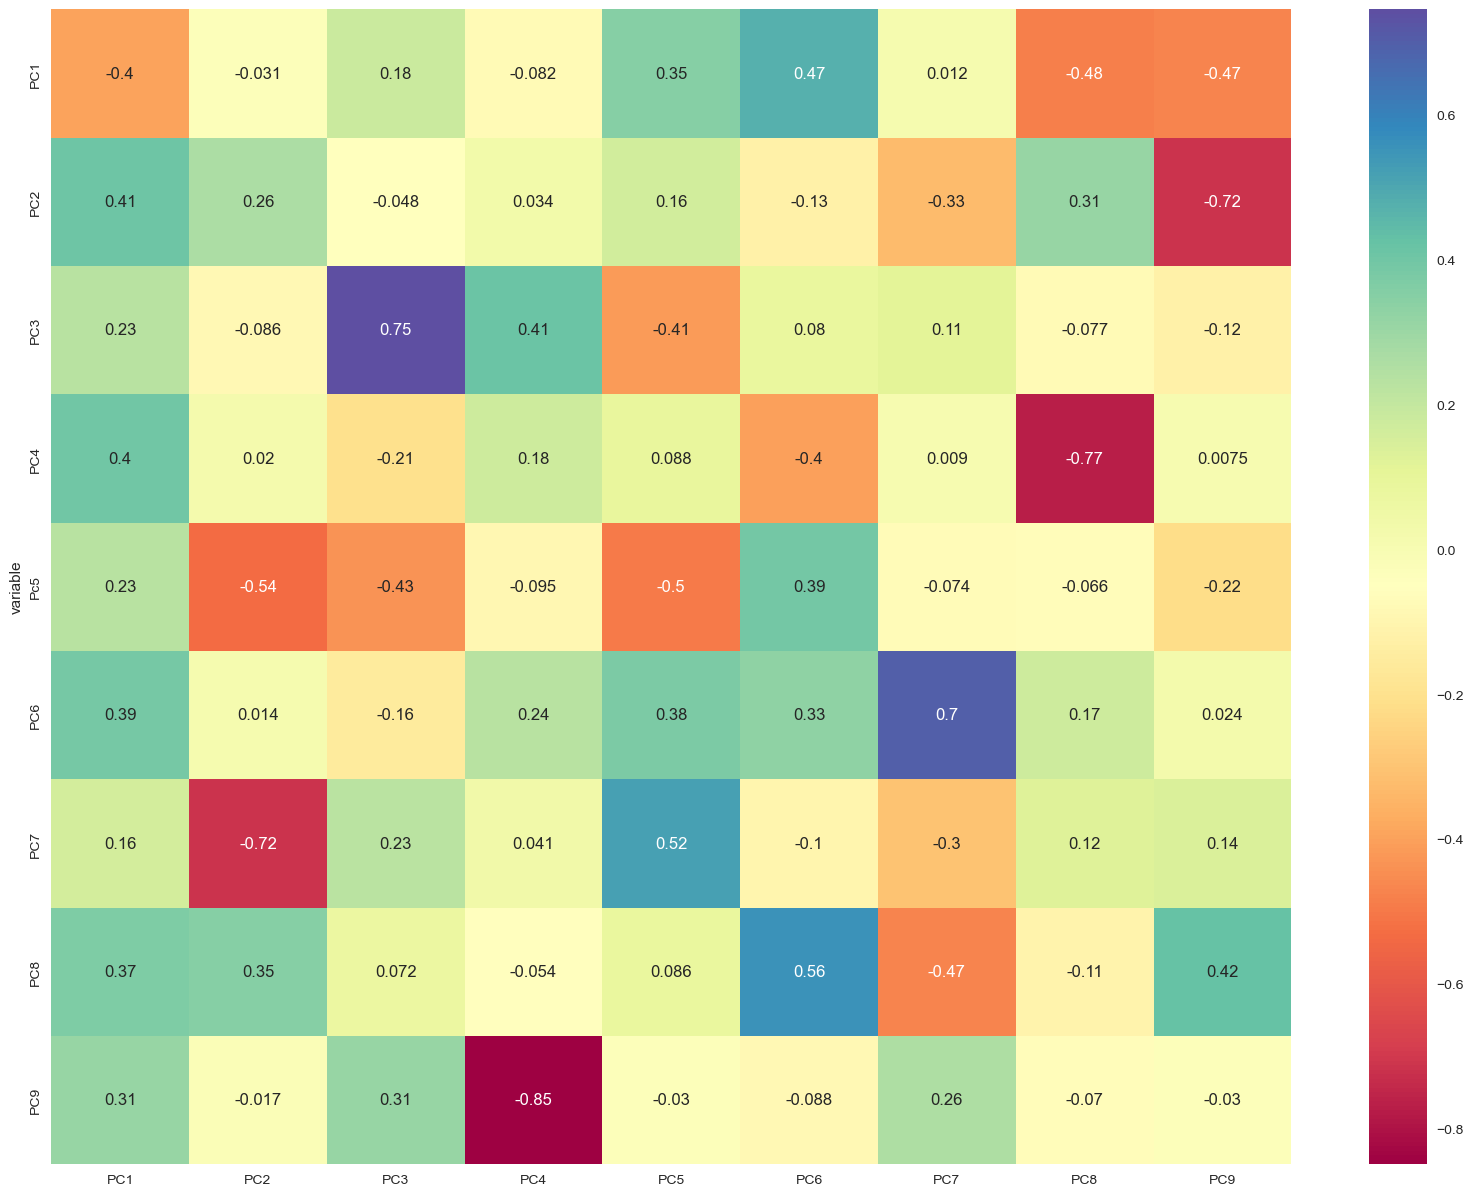

In [62]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_dd, annot=True, cmap='Spectral')
plt.show()

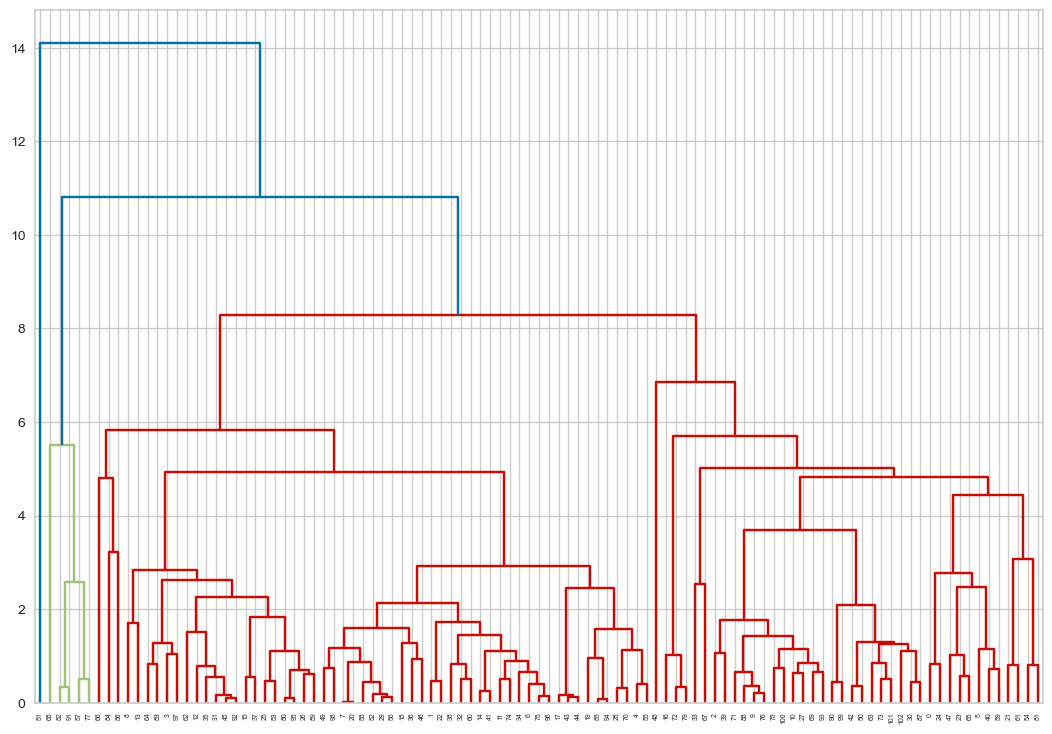

In [63]:

linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

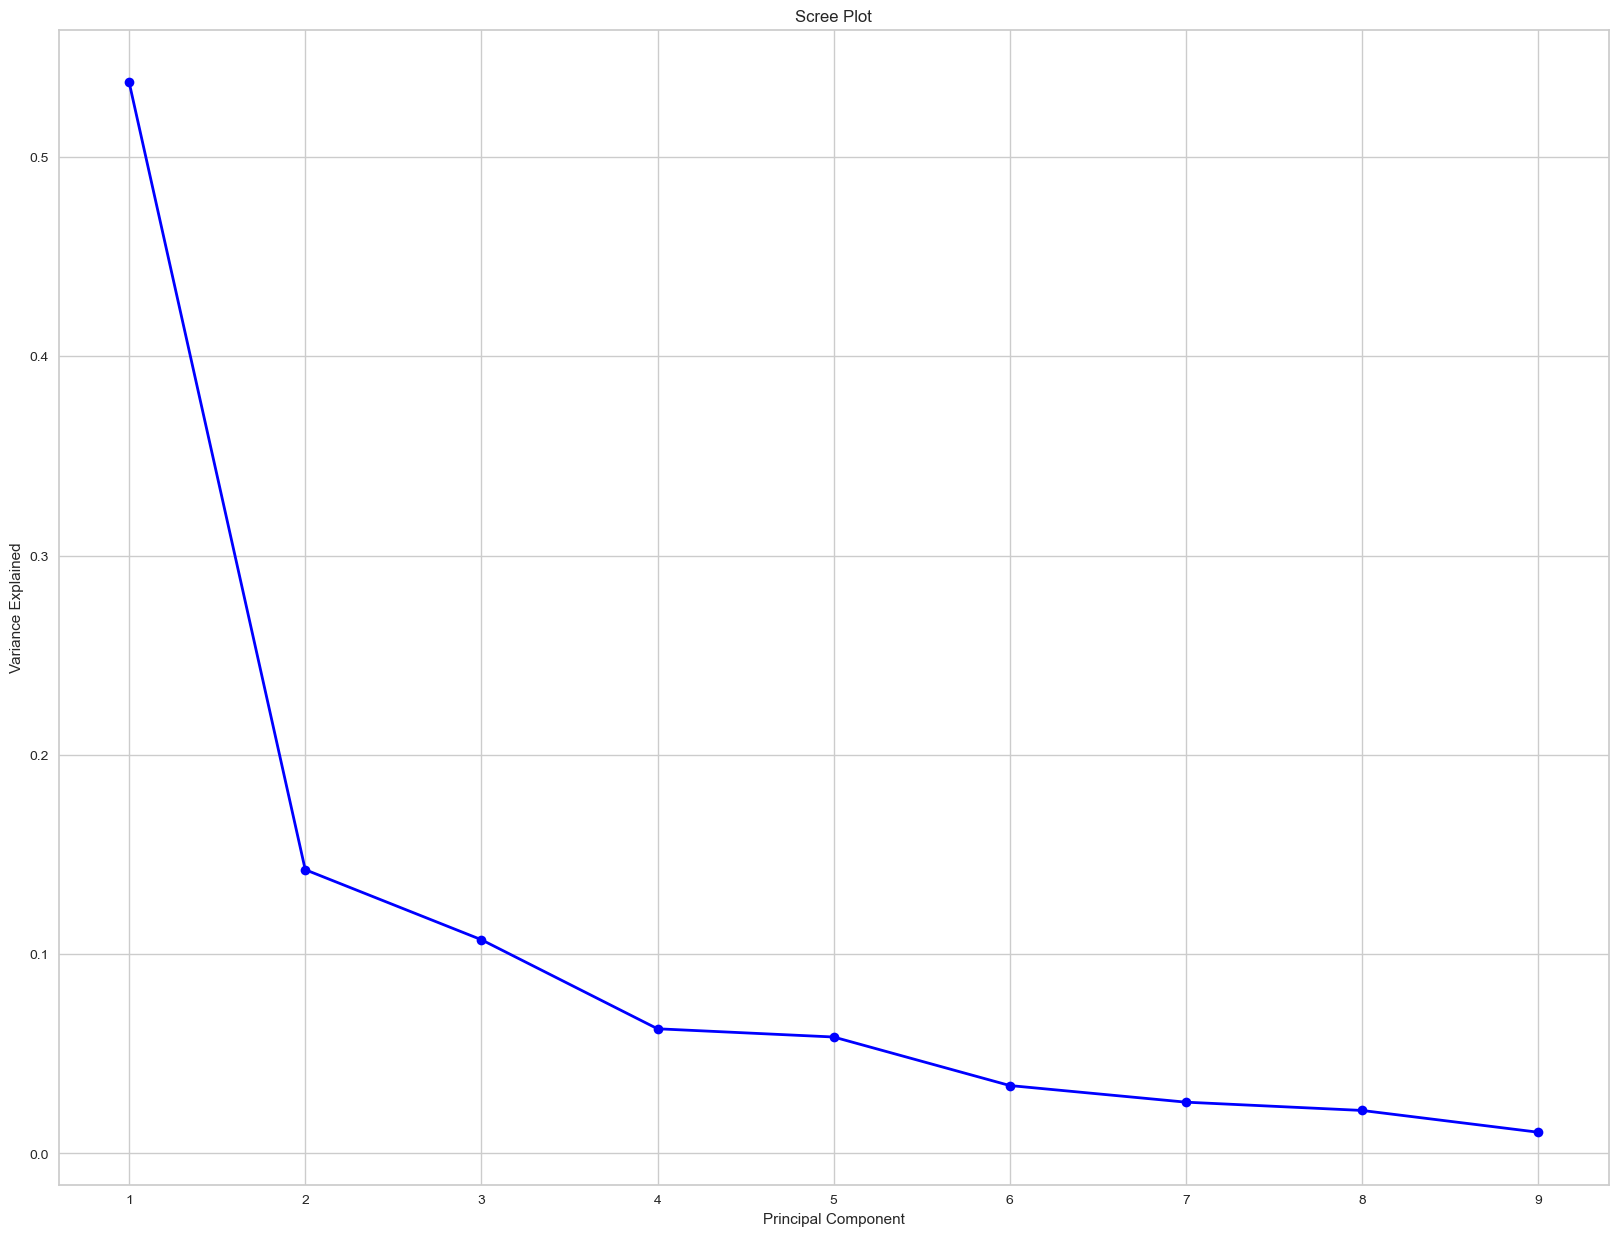

In [64]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416:

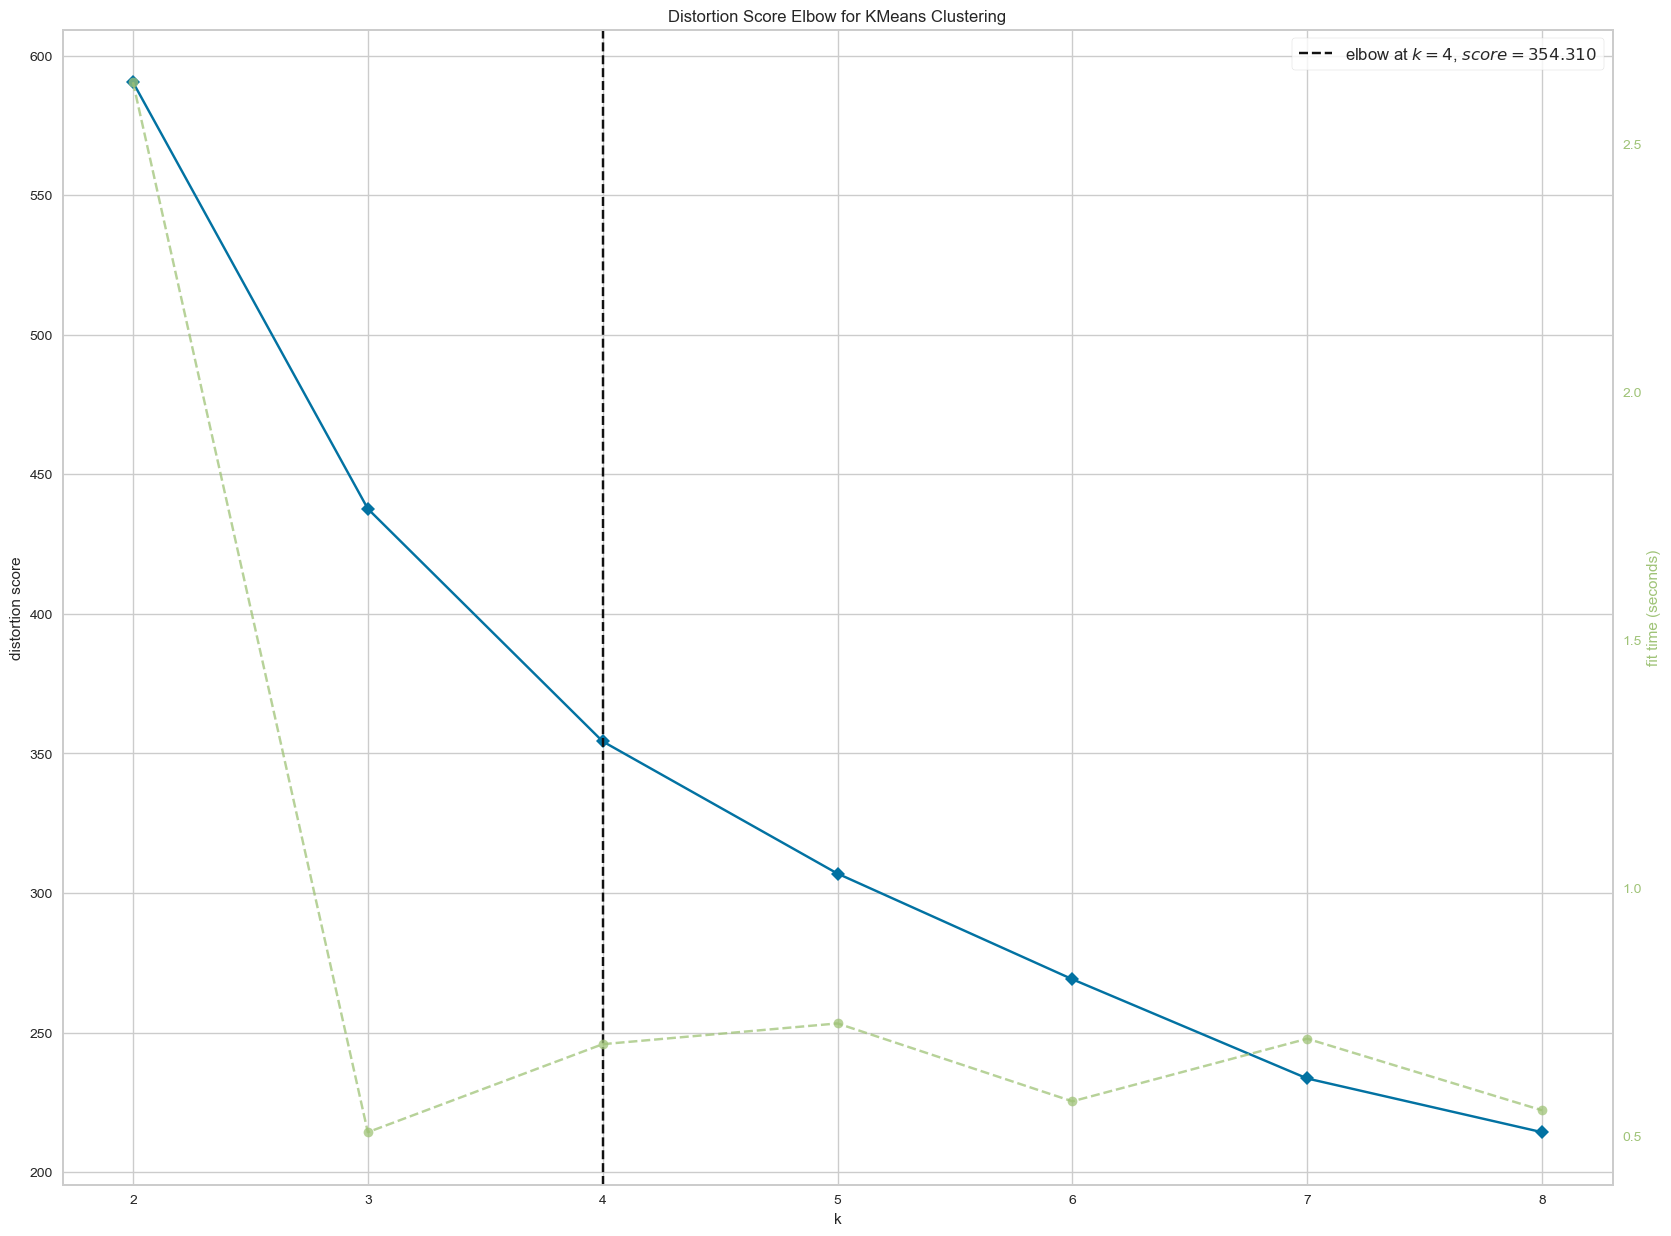

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
# Fit the data to the visualizer
visualizer.fit(t)  
# Finalize and render the figure
visualizer.show()        

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416:

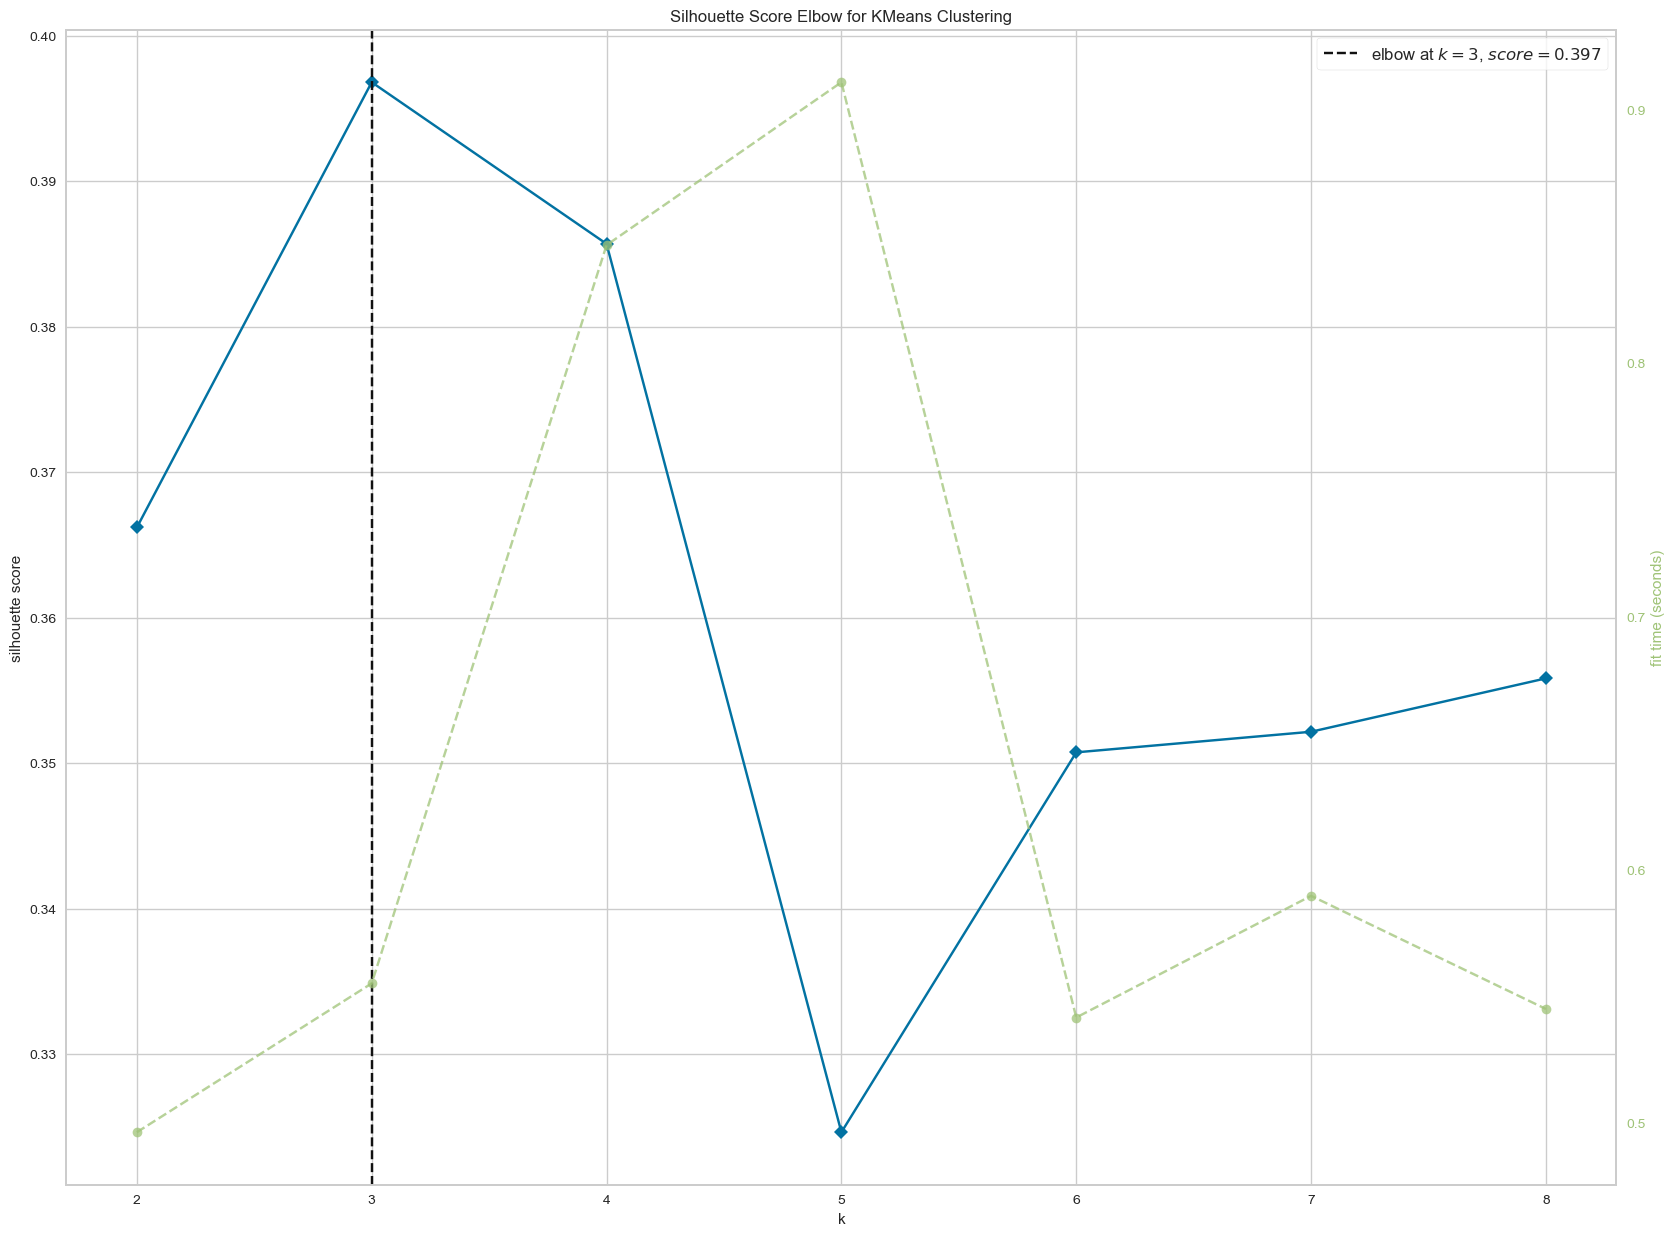

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [66]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
# Fit the data to the visualizer
visualizer.fit(t) 
# Finalize and render the figure
visualizer.show()        

In [68]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
dd['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[3 1 0 1 1 3 1 1 1 0 0 1 1 0 1 1 3 1 1 1 1 0 1 3 3 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 3 1 0 1 1 1 1 3 3 1 0 3 1 1 0 1 1 2 1 3 1 0 0 0 1 3 1 0 2 0 1 0 3 0
 1 1 0 2 0 3 1 0 2 1 0 1 0 0 0 1 0 2 1 0 1 1 1 1 1 0 0 0 0]
354.3939547498791
4
[[ 1.49513 -0.45952  0.74981 -0.07565 -0.1012  -0.19196  0.16665  0.0294
   0.05299]
 [-1.23431 -0.3704  -0.48236  0.11617 -0.10852  0.12902 -0.05388  0.02073
  -0.04087]
 [-4.97444  3.0402   1.8459   0.2366   1.16331 -0.53549  0.07533  0.0564
   0.09278]
 [ 3.26512  1.47191 -0.5891  -0.37841  0.24411  0.15247 -0.21951 -0.17861
   0.0005 ]]


In [69]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({3: 13, 1: 53, 0: 32, 2: 5})

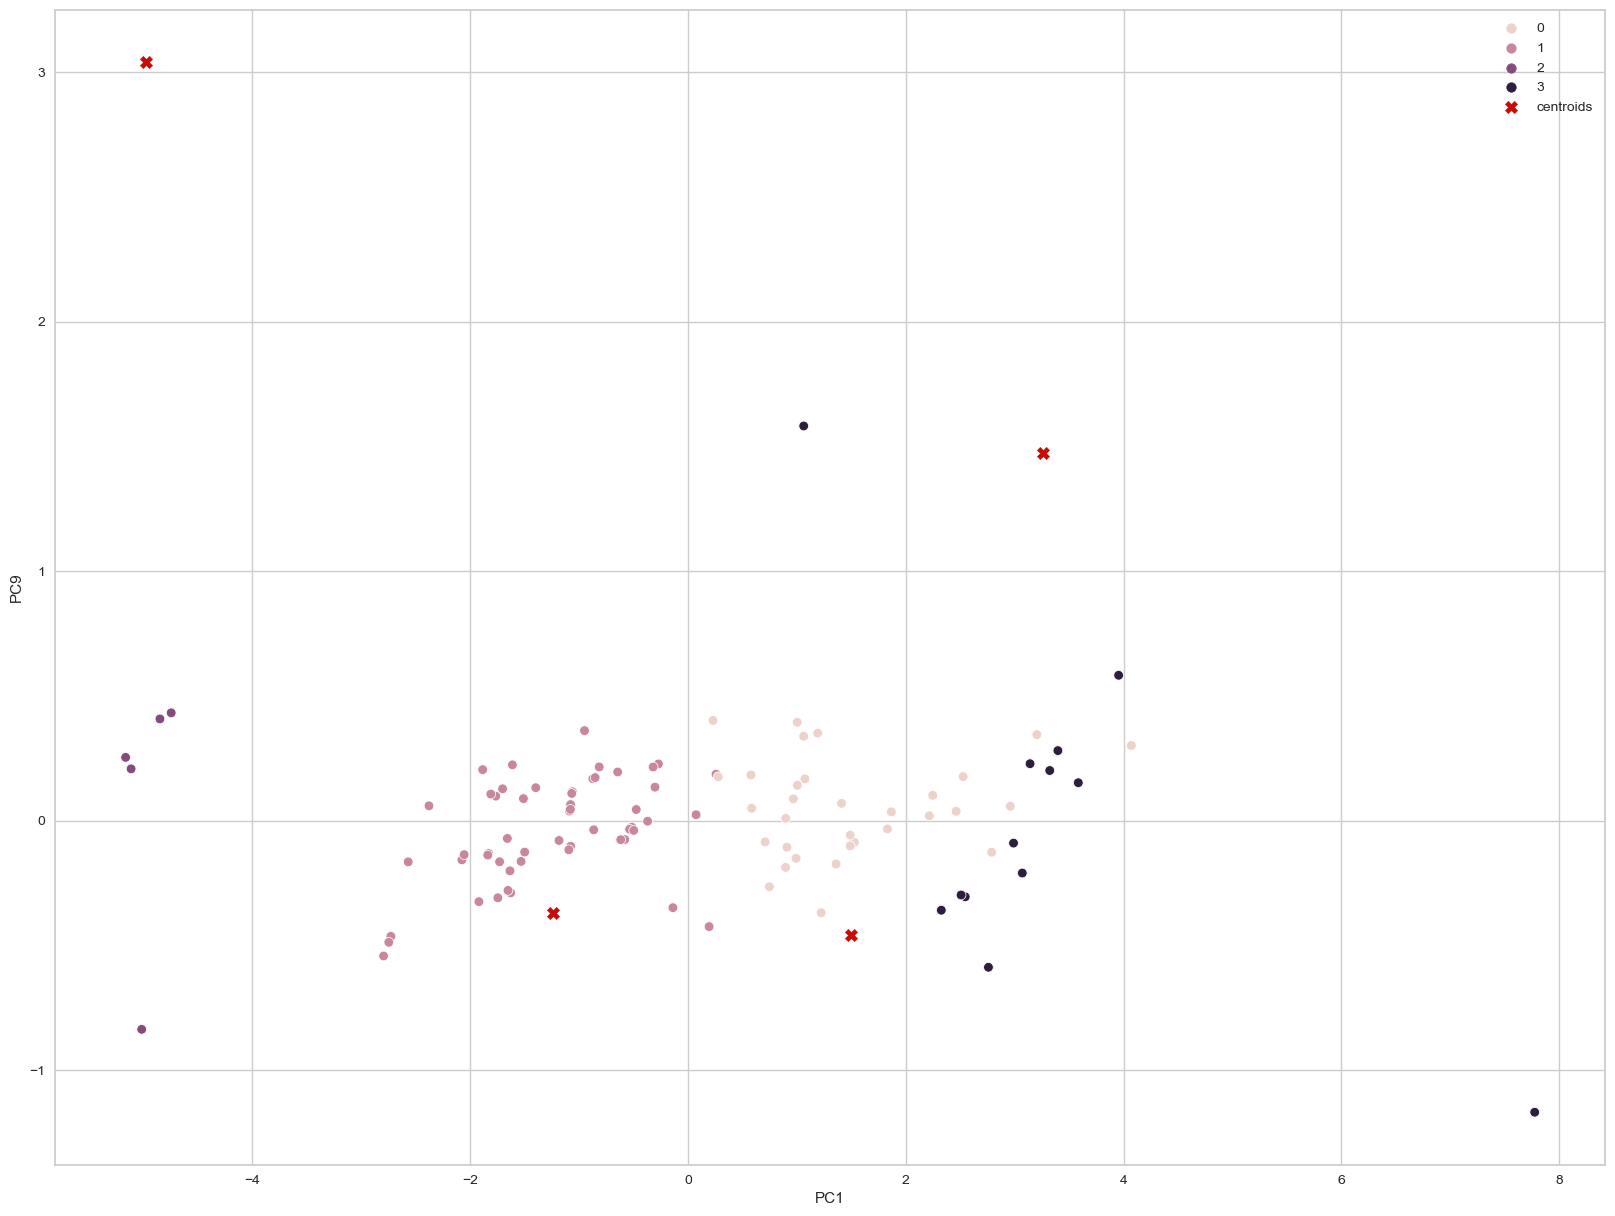

In [70]:

#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [71]:
#regression for data2
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=dd['INR(10e3)']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [73]:
print(lm.intercept_)

4643.522050485438


In [74]:
lm.coef_

array([ 1050.51269,   982.73452,   202.46698,  -151.64849,   241.89067,
        1571.09433, -1339.28395,  -313.32264,  1198.03226])

In [75]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [76]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1050.5127
PC2,982.7345
PC3,202.4670
PC4,-151.6485
Pc5,241.8907
PC6,1571.0943
PC7,-1339.2840
PC8,-313.3226
PC9,1198.0323


In [77]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [78]:
y_test

37    3744.0000
1     2496.0000
69    5233.2800
80    3243.7184
92    3064.8384
61    5459.5840
85    2903.6800
53    3328.0000
88    3952.0000
32    2594.5088
6     2654.0800
71    3744.0000
43    2041.2288
16   15040.9792
50    6609.8240
31    3170.3360
97    4451.2000
14    2866.9888
25    3744.0000
51   17888.0000
21    4877.1840
3     5660.9280
84    5876.4992
57    2062.5280
48   12396.8000
47    8565.0240
79   12338.6432
58    3328.0000
2     4695.8080
13    5408.0000
45    3064.8384
89    3120.0000
41    2826.3872
23   10400.0000
26    2745.6000
22    2912.0000
94    3153.2800
27    5028.3584
20    2424.9472
66    2766.0672
30    5604.1856
35    3098.1184
Name: INR(10e3), dtype: float64

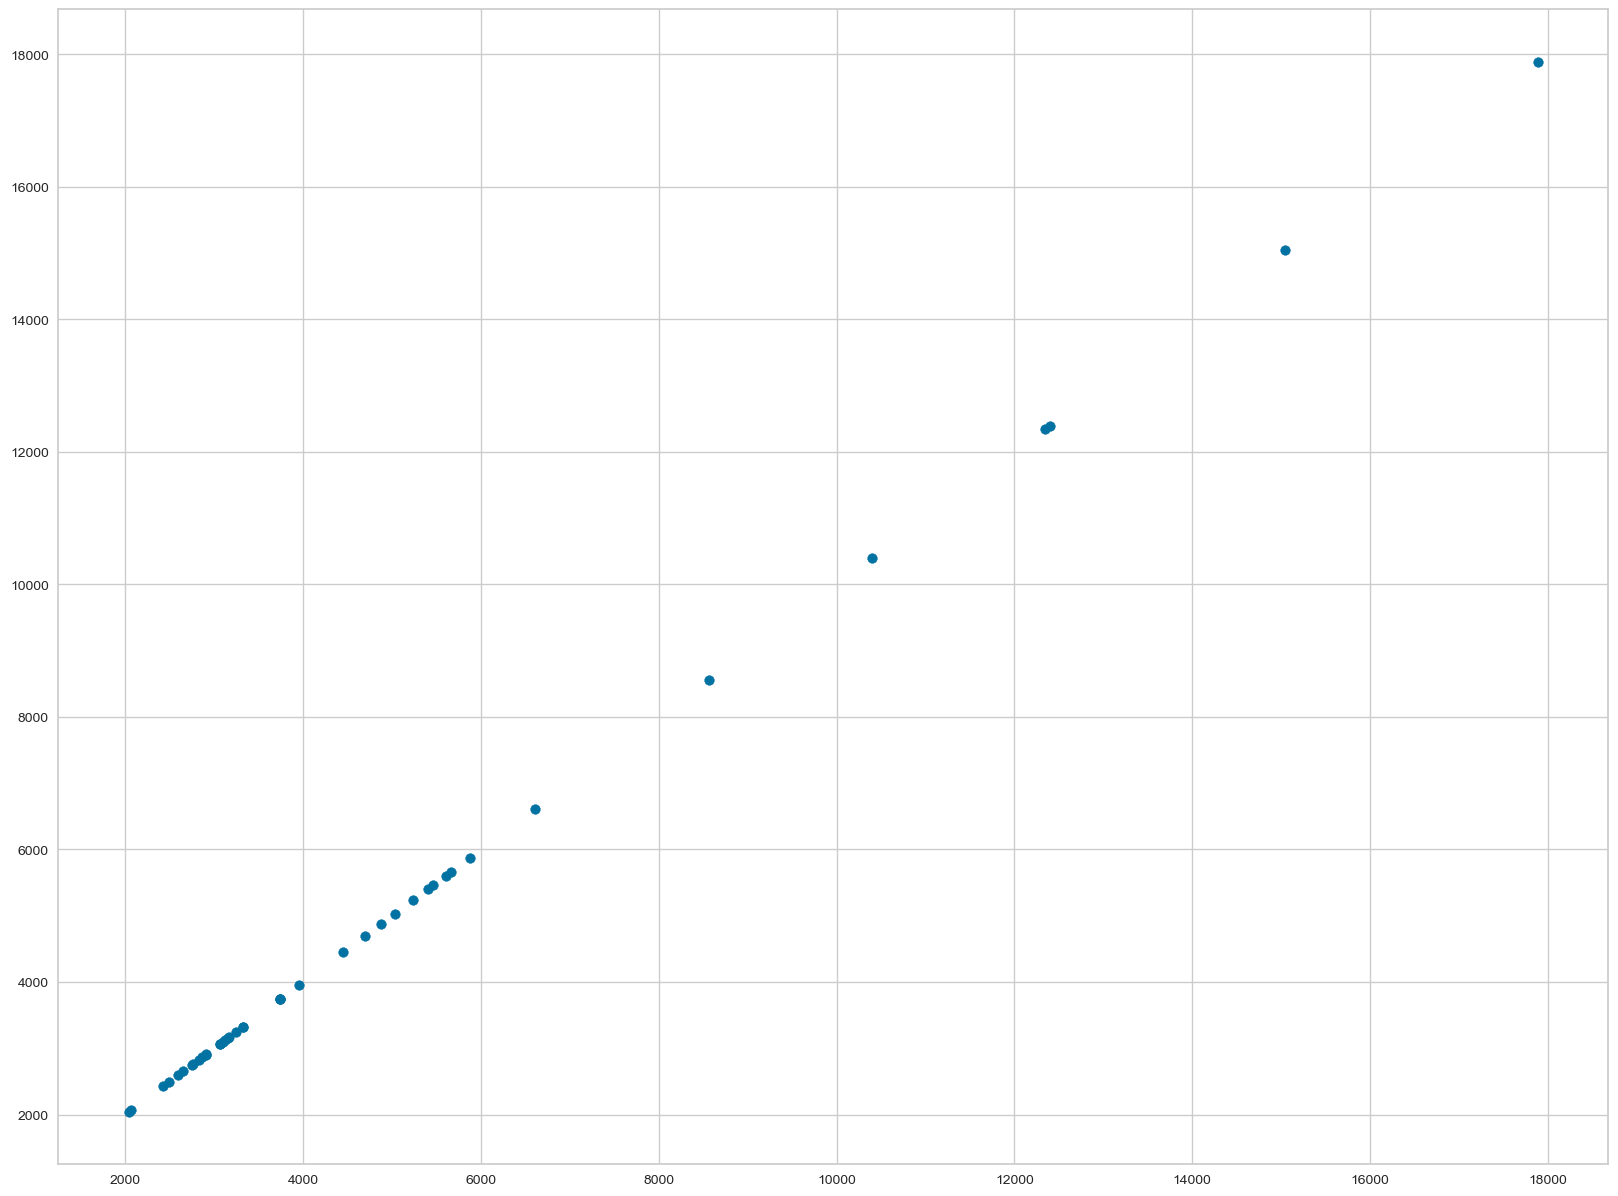

In [79]:
plt.scatter(y_test, predictions)

C:\Users\sarav\AppData\Local\Temp\ipykernel_7892\3016481388.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='INR(10e3)', ylabel='Density'>

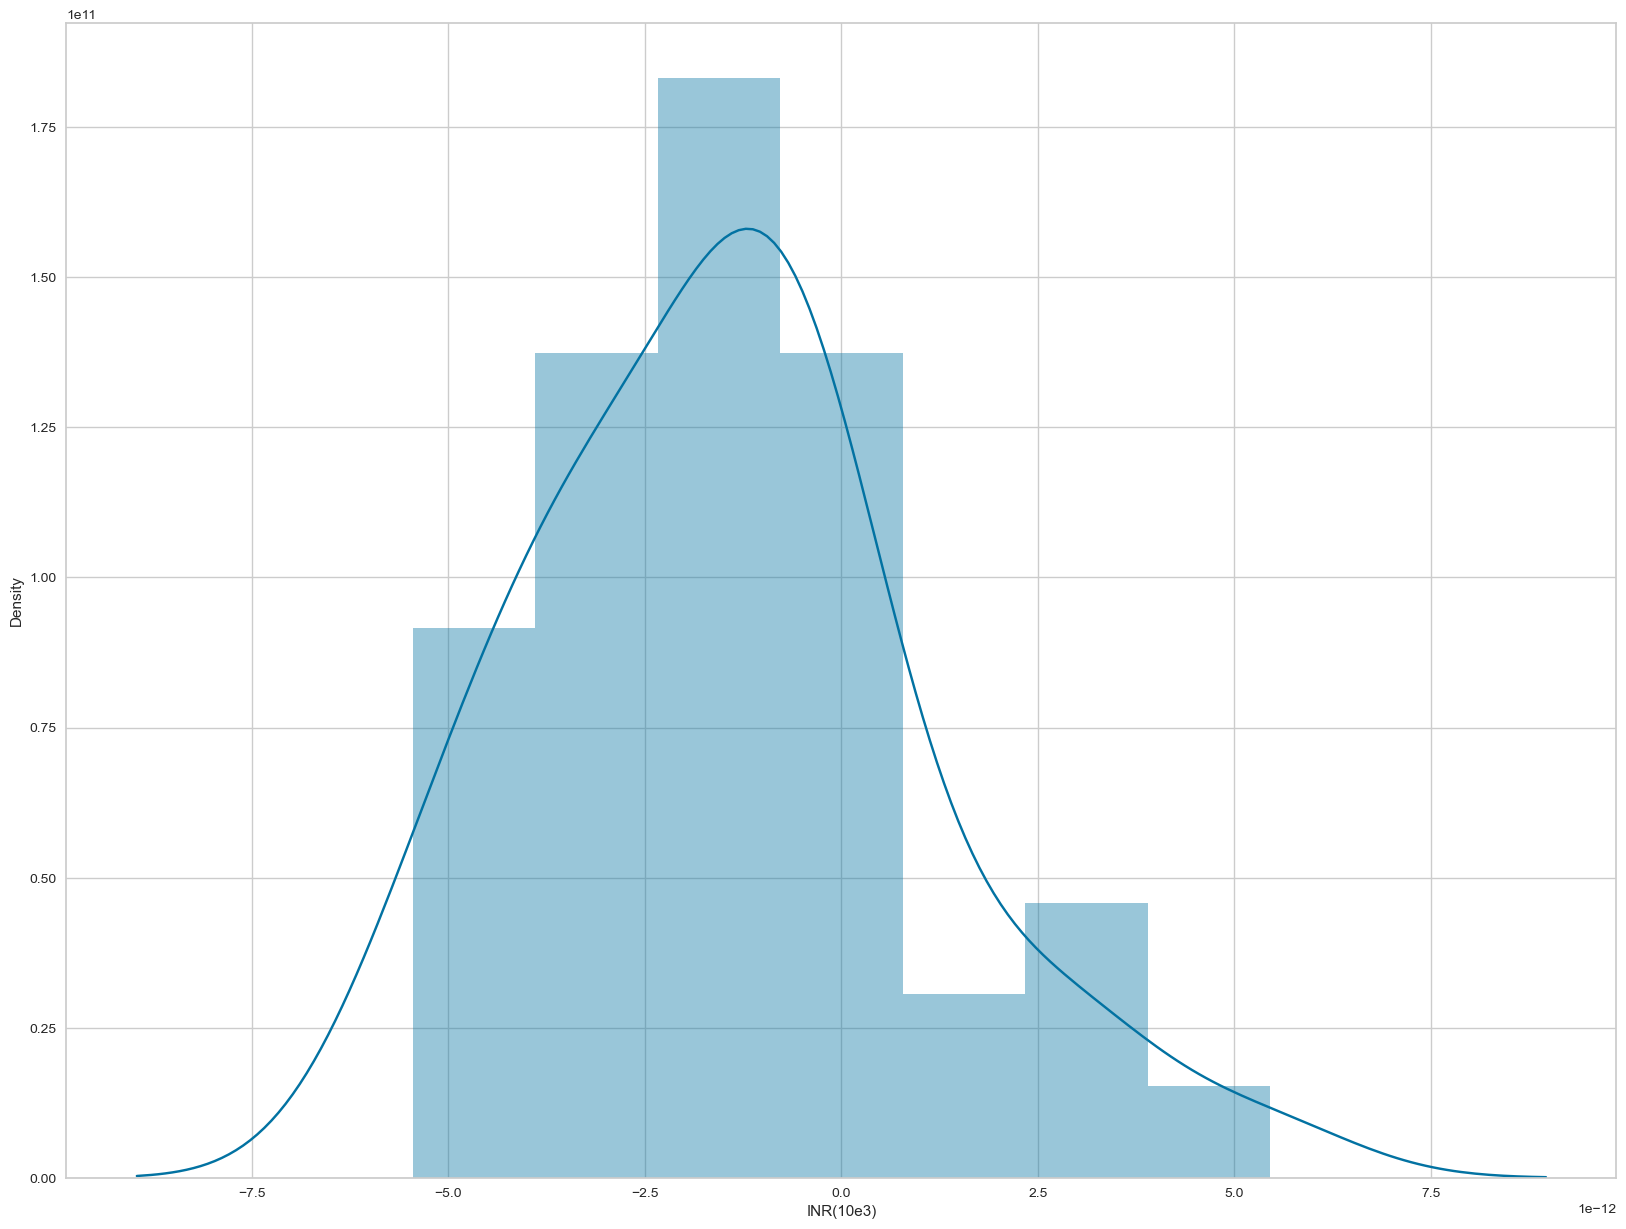

In [80]:
#Residual histogram plot
sb.distplot((y_test-predictions))

In [83]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.306218708067068e-12
MSE: 8.089629443003717e-24
RMSE: 2.8442273894686616e-12


In [84]:
metrics.mean_absolute_error(y_test,predictions)

2.306218708067068e-12

In [85]:
metrics.mean_squared_error(y_test,predictions)

8.089629443003717e-24

In [87]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.8442273894686616e-12